<a href="https://colab.research.google.com/github/leanguzman/Mercado_Inmobiliario_BsAs/blob/main/Mercado_Inmobiliario_BA_Guzman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCION

#PROBLEMATICA

El mercado inmobiliario en Argentina presenta una alta dispersión de precios debido a la inflación, la dolarización de las propiedades y las diferencias entre barrios. Esto dificulta tanto a compradores como a vendedores establecer valores de referencia. Este análisis busca aportar claridad mediante estadísticas y visualizaciones que permitan identificar patrones, zonas sobrevaluadas o subvaluadas, y variables que más influyen en el precio. Además, puede ser útil para personas interesadas en invertir en inmuebles o entender las dinámicas urbanas del país.

# FUENTE


El dataset fue descargado de la plataforma Kaggle (https://www.kaggle.com/).
El mismo se encuentra en https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset

# IMPORTACION DE LIBRERIAS


In [ ]:
from google.colab import files
files.upload()  # Subí el `kaggle.json`

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leandrowolf","key":"85efbfe419415e0aad656179342735bf"}'}

In [ ]:
!pip install kaggle

#CARGA DE DATASET

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s properati


ref                                                          title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
properati-data/properties                                    Current Properati Listing Information               326644756  2017-07-03 21:06:10.580000            590         18  0.64705884       
franvaluch/properati-dataset                                 Properati Dataset                                    46057020  2020-11-24 20:10:53.070000            409          5  0.47058824       
jluza92/argentina-properati-listings-dataset-20202021        Properati Listings Dataset (2020-2021)              287463276  2021-06-28 16:19:32.537000            601          6  1.0              
rmjacobsen/property-

#LECTURA DE DATASET

In [ ]:
!kaggle datasets download -d alejandroczernikier/properati-argentina-dataset

Dataset URL: https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset
License(s): unknown
 51% 115M/227M [00:00<00:00, 1.19GB/s]
100% 227M/227M [00:00<00:00, 628MB/s] 


In [ ]:
import zipfile
with zipfile.ZipFile("properati-argentina-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("properati_argentina")

import os
os.listdir("properati_argentina")

['entrenamiento.csv']

#VALIDACION DE DATOS

In [ ]:
import pandas as pd

df = pd.read_csv("properati_argentina/entrenamiento.csv")
df.head()


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [ ]:
df.shape  # (filas, columnas)

(992192, 25)

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("properati_argentina/entrenamiento.csv")

# Ver resumen de todas las columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
df.info()  # Muestra nombres, tipos de datos y nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [ ]:
df['l6'].dropna().unique()[:20]  # muestra solo los primeros 20 valores

array([], dtype=float64)

In [ ]:
# Cantidad de filas y columnas
df.shape

(992192, 25)

In [ ]:
# Estadísticas básicas

df.describe()

,id,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,992192.000000,838994.000000,839929.000000,0.0,503045.000000,390699.000000,773021.000000,448164.00000,4.369610e+05,9.478110e+05
mean,500338.438758,-59.266586,-34.793745,NaN,2.858577,2.086094,1.697637,493.51136,5.769533e+02,2.881687e+05
std,288685.497758,2.707383,3.066257,NaN,1.682454,2.705342,1.072722,4101.38179,7.383998e+04,5.560863e+06
min,1.000000,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.00000,-1.700000e+02,0.000000e+00
25%,250259.750000,-58.756011,-34.921709,NaN,2.000000,1.000000,1.000000,50.00000,4.500000e+01,3.900000e+04
50%,500641.500000,-58.444383,-34.610508,NaN,3.000000,2.000000,1.000000,95.00000,7.500000e+01,9.800000e+04
75%,750507.250000,-58.058983,-34.459156,NaN,4.000000,3.000000,2.000000,270.00000,1.550000e+02,2.100000e+05
max,1000000.000000,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.00000,2.700000e+07,3.100000e+09


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
l6,992192
l5,987481
l4,766797
price_period,622253
bedrooms,601493
surface_covered,555231
surface_total,544028
rooms,489147
bathrooms,219171
lat,153198


Analizando los 2 ultimos comandos precedentes, se puede notar que la columna l6 tiene todas las filas vacias.
Por lo cual, se procede a eliminar la mencionada columna; junto con la de title y description, debido a que no aportan valor al ser texto libre (con informacion que esta en otras columnas) y provocan a su vez que el archivo sea extremadamente pesado.

In [ ]:
df = df.drop(columns=[col for col in ['l6', 'title', 'description'] if col in df.columns])

In [ ]:
df.duplicated().sum()  # cantidad de filas duplicadas

np.int64(0)

# PREPARACION DEL DATASET

In [ ]:
df.to_csv("properati_limpio.v2.csv", index=False)

In [ ]:
from google.colab import files
files.download("properati_limpio.v2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -q gdown
import gdown

url = "https://drive.google.com/uc?id=1WfdZn8gFb5WQoJmchIMXRck0ArYc5FNJ"
output = "properati_limpio.v2.csv"
gdown.download(url, output, quiet=False)

# Cargar el CSV
import pandas as pd
df = pd.read_csv(output)
df.info()

Downloading...
From (original): https://drive.google.com/uc?id=1WfdZn8gFb5WQoJmchIMXRck0ArYc5FNJ
From (redirected): https://drive.google.com/uc?id=1WfdZn8gFb5WQoJmchIMXRck0ArYc5FNJ&confirm=t&uuid=28db60bf-4ece-4376-b864-3ba36e231867
To: /content/properati_limpio.v2.csv
100%|██████████| 160M/160M [00:02<00:00, 56.5MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  rooms            503045 non-null  float64
 13  bedrooms         390699 non-null  float64
 14  bathrooms        773021 non-null  float64
 15  surface_total    448164 non-null  float64
 16  surface_covered  436961 non-null  floa

In [ ]:
df['precio_m2_total'] = df.apply(
    lambda row: row['price'] / row['surface_total']
    if pd.notna(row['price']) and pd.notna(row['surface_total']) and row['surface_total'] > 0
    else None,
    axis=1
)

In [ ]:
# Guardar como CSV listo para abrir en Excel
df.to_csv("properati_limpio.v3.0.csv", index=False, sep=';', decimal=',', float_format='%.2f')

# Descargar el archivo
from google.colab import files
files.download("properati_limpio.v3.0.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Cargar el archivo existente (ajustá el nombre si es otro)
df = pd.read_csv("properati_limpio.v3.0.csv", sep=';', decimal=',')

# Filtrar solo las filas donde l1 es exactamente 'Argentina'
df = df[df['l1'] == 'Argentina']

# Guardar el nuevo archivo limpio
df.to_csv("properati_limpio_ARG.csv", index=False, sep=';', decimal=',')

# Descargar el archivo
from google.colab import files
files.download("properati_limpio_ARG.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Instalar gdown si no está
!pip install -q gdown

import gdown
import pandas as pd

# ID del archivo desde Drive (nuevo link)
file_id = "1TM8W2zEx7yO0vvdpP7palGQ5jUiP_eQv"
url = f"https://drive.google.com/uc?id={file_id}"
output = "properati_limpio_ARG.csv"  # mantener el nombre original

# Cargar el CSV con separador y decimal correctos
df = pd.read_csv(output, sep=';', decimal=',')

# Verificar estructura
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973422 entries, 0 to 973421
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               973422 non-null  int64  
 1   ad_type          973422 non-null  object 
 2   start_date       973422 non-null  object 
 3   end_date         973422 non-null  object 
 4   created_on       973422 non-null  object 
 5   lon              821277 non-null  object 
 6   lat              822212 non-null  object 
 7   l1               973422 non-null  object 
 8   l2               973422 non-null  object 
 9   l3               923562 non-null  object 
 10  l4               224626 non-null  object 
 11  l5               4711 non-null    object 
 12  rooms            491028 non-null  object 
 13  bedrooms         383960 non-null  object 
 14  bathrooms        756473 non-null  object 
 15  surface_total    436136 non-null  float64
 16  surface_covered  423238 non-null  obje

In [ ]:
import pandas as pd

# --- CORRECCIÓN ---
# Cargar el archivo original
df = pd.read_csv("properati_limpio_ARG.csv", sep=";", decimal=",")

# Forzar a numérico las columnas críticas
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["surface_total"] = pd.to_numeric(df["surface_total"], errors="coerce")

# Si ya existe precio_m2_total, convertir también
if "precio_m2_total" in df.columns:
    df["precio_m2_total"] = pd.to_numeric(df["precio_m2_total"], errors="coerce")

# Guardar sobrescribiendo el mismo archivo
output_file = "properati_limpio_ARG.csv"
df.to_csv(output_file, sep=";", decimal=",", index=False)

print("✅ Archivo corregido y sobrescrito:", output_file)

# --- DESCARGA ---
try:
    from google.colab import files
    files.download(output_file)
except ImportError:
    print("⚠️ Descarga automática solo disponible en Google Colab. "
          "Si usás Jupyter, el archivo ya está en tu carpeta de trabajo.")


✅ Archivo corregido y sobrescrito: properati_limpio_ARG.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PREGUNTAS

##PREGUNTA 1

¿Qué zona tiene el precio por metro cuadrado más alto?

##PREGUNTA 2

Basándose en las 5 zonas con más publicaciones, ¿cuál es la evolución del precio promedio de propiedades en venta según la zona (l2)?

## PREGUNTA 3

¿Existe relación entre los metros cubiertos (surface_covered) y el precio de publicación?

##PREGUNTA 4

¿Hay diferencias de precio por cantidad de habitaciones o baños?

##PREGUNTA 5

¿Cuál es la distribución geográfica de las publicaciones en CABA y GBA?

##PREGUNTA 6

¿Qué tipo de propiedad destinada a vivienda muestra mayor variabilidad de precios en GBA (USD)?

# ANALISIS 1


##PREPARACION PARA EL ANALISIS & GRAFICO

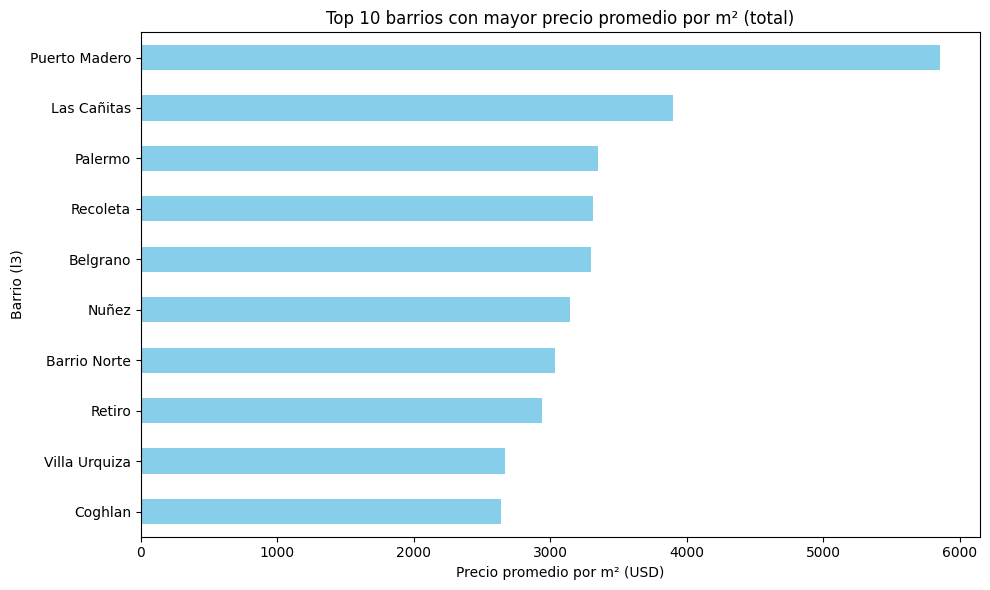

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo limpio ya existente
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# PASO 1 (Opción A): Filtrar por tipo de propiedad (solo propiedades residenciales)
tipos_validos = ['Departamento', 'PH', 'Casa']
df_filtrado = df[df['property_type'].isin(tipos_validos)]

# PASO 2: Filtrar por moneda en USD
df_filtrado = df_filtrado[df_filtrado['currency'] == 'USD']

# PASO 2.1 (Opción B): Excluir publicaciones de alquiler (price_period vacío)
df_filtrado = df_filtrado[df_filtrado['price_period'].isna()]

# PASO 3: Calcular precio_m2_total (si no existe ya)
if 'precio_m2_total' not in df_filtrado.columns:
    df_filtrado['precio_m2_total'] = df_filtrado.apply(
        lambda row: row['price'] / row['surface_total']
        if pd.notna(row['price']) and pd.notna(row['surface_total']) and row['surface_total'] > 0
        else None,
        axis=1
    )

# PASO 3.1: Eliminar outliers de precio por m² (valores extremos que distorsionan)
df_filtrado = df_filtrado[
    (df_filtrado['precio_m2_total'] >= 300) &
    (df_filtrado['precio_m2_total'] <= 10000)
]

# PASO 4: Filtrar por barrios y precio_m2_total
df_zona_total = df_filtrado[['l3', 'precio_m2_total']].dropna()

# PASO 4.1: Filtrar barrios con al menos 10 propiedades
conteo_barrios = df_zona_total['l3'].value_counts()
barrios_validos = conteo_barrios[conteo_barrios >= 10].index
df_zona_total = df_zona_total[df_zona_total['l3'].isin(barrios_validos)]

# Agrupar por barrio y calcular el promedio de precio por m²
zonas_promedio = df_zona_total.groupby('l3')['precio_m2_total'].mean().sort_values(ascending=False).head(10)

# PASO 5: Graficar resultados
plt.figure(figsize=(10, 6))
zonas_promedio.plot(kind='barh', color='skyblue')
plt.xlabel('Precio promedio por m² (USD)')
plt.ylabel('Barrio (l3)')
plt.title('Top 10 barrios con mayor precio promedio por m² (total)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##CONCLUSIONES

El gráfico presentado expone los diez barrios con mayor precio promedio por metro cuadrado (expresado en USD) para propiedades en venta dentro del territorio argentino, una vez excluidos valores atípicos y localidades del exterior. La información se filtró cuidadosamente para conservar únicamente aquellos registros con datos válidos de superficie total y precios en dólares.

Los resultados muestran una fuerte concentración de los valores más elevados en barrios ubicados en la Ciudad Autónoma de Buenos Aires (CABA). Puerto Madero lidera ampliamente el ranking, consolidándose como el sector con mayor valorización inmobiliaria del país. A continuación se ubican Las Cañitas, Palermo, Recoleta y Belgrano, todos barrios de alta demanda residencial, reconocidos por su infraestructura consolidada y su proximidad a centros comerciales y culturales.

También se destacan barrios como Villa Urquiza y Coghlan, cuya presencia en el ranking sugiere procesos recientes de revalorización urbana, impulsados en parte por nuevas construcciones y mejoras en la conectividad.

Este análisis resulta de utilidad para comprender la distribución territorial del valor inmobiliario en Argentina, y permite identificar áreas con potencial atractivo para la inversión o el desarrollo urbano.

# ANALISIS 2


##PREPARACION PARA EL ANALISIS & GRAFICO

In [ ]:
# Conteo total de publicaciones por l2 (zona/provincia)
conteo_l2 = df['l2'].value_counts()

# Conteo total de publicaciones por l3 (barrio)
conteo_l3 = df['l3'].value_counts()

# Mostrar comparativamente
print("Cantidad de zonas únicas (l2):", conteo_l2.shape[0])
print("Cantidad de barrios únicos (l3):", conteo_l3.shape[0])

print("\nTop zonas (l2) con más publicaciones:")
print(conteo_l2.head(10))

print("\nTop barrios (l3) con más publicaciones:")
print(conteo_l3.head(10))

print("\nZonas (l2) con menos publicaciones:")
print(conteo_l2.tail(10))

print("\nBarrios (l3) con menos publicaciones:")
print(conteo_l3.tail(10))


Cantidad de zonas únicas (l2): 28
Cantidad de barrios únicos (l3): 1242

Top zonas (l2) con más publicaciones:
l2
Capital Federal                 249738
Buenos Aires Costa Atlántica    178712
Bs.As. G.B.A. Zona Norte        127510
Bs.As. G.B.A. Zona Sur          112975
Santa Fe                         93111
Bs.As. G.B.A. Zona Oeste         73172
Córdoba                          60877
Buenos Aires Interior            22280
Mendoza                          11558
Neuquén                          10642
Name: count, dtype: int64

Top barrios (l3) con más publicaciones:
l3
Mar del Plata      158074
Rosario             69559
Tigre               40334
Palermo             35626
La Plata            34816
Córdoba             25685
Lomas de Zamora     22664
Pilar               18898
Belgrano            17713
Morón               16585
Name: count, dtype: int64

Zonas (l2) con menos publicaciones:
l2
San Juan               1014
Chubut                  979
La Pampa                910
Jujuy           

/tmp/ipython-input-38-274702415.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')


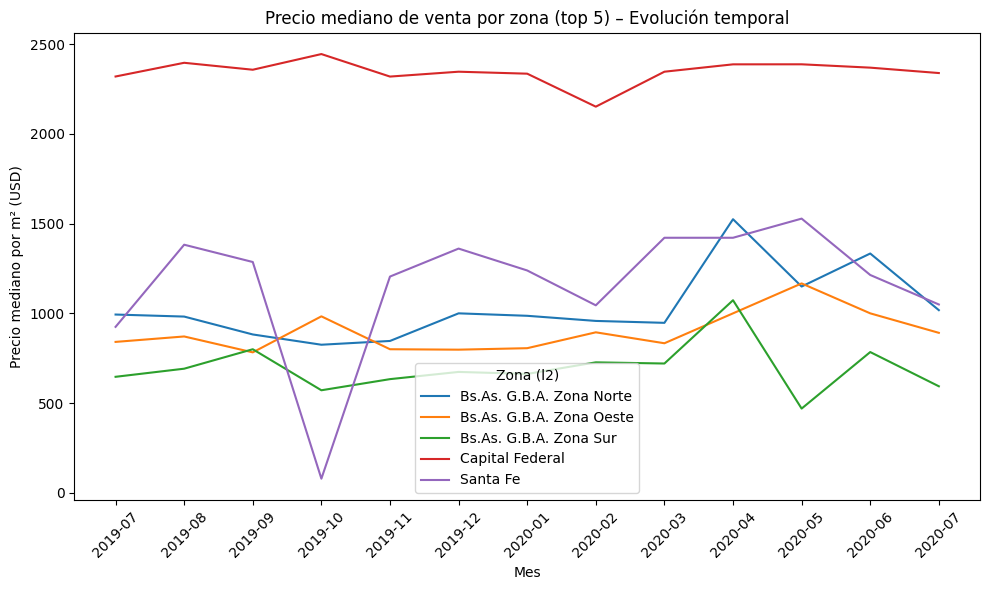

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Cargar el dataset
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# Crear columna con año y mes si no existe
if 'año_mes' not in df.columns:
    df['año_mes'] = pd.to_datetime(df['created_on']).dt.to_period('M').astype(str)

# Filtrar propiedades en venta en USD, sin alquileres, con datos válidos
df_filtrado = df[
    (df['currency'] == 'USD') &
    (df['price_period'].isna()) &
    (df['precio_m2_total'].notna()) &
    (df['l2'].notna())
]

# Agrupar por mes y zona (l2) usando MEDIANA
evolucion = df_filtrado.groupby(['año_mes', 'l2'])['precio_m2_total'].median().reset_index()

# Seleccionar las 5 zonas con más publicaciones
zonas_top = df_filtrado['l2'].value_counts().head(5).index
evolucion_top = evolucion[evolucion['l2'].isin(zonas_top)]

# Pivotear para graficar
pivot = evolucion_top.pivot(index='año_mes', columns='l2', values='precio_m2_total')

# Graficar
plt.figure(figsize=(10, 6))
for zona in pivot.columns:
    plt.plot(pivot.index, pivot[zona], label=zona)

plt.title("Precio mediano de venta por zona (top 5) – Evolución temporal")
plt.xlabel("Mes")
plt.ylabel("Precio mediano por m² (USD)")
plt.xticks(rotation=45)
plt.tight_layout()

# Ubicar la leyenda dentro del gráfico (arriba a la derecha)
plt.legend(title="Zona (l2)", loc='lower center')

plt.show()

# Guardar el CSV actualizado
df.to_csv("properati_limpio_ARG.csv", index=False, sep=';', decimal=',')

# Descargarlo
files.download("properati_limpio_ARG.csv")


##CONCLUSIONES

En este análisis se utilizó el precio mediano por m² en lugar del promedio para evitar distorsiones generadas por valores atípicos, como ocurrió en Santa Fe, donde la media mostraba un pico abrupto en enero de 2020 que desaparece al usar la mediana, lo que permite reflejar mejor el comportamiento real del mercado. Se trabajó con las cinco zonas (l2) con mayor cantidad de publicaciones, lo que ayudó a minimizar el sesgo por escasez de datos, aunque igualmente se observó mayor variabilidad en zonas con menor volumen, como Santa Fe. Capital Federal se mantuvo como la zona con precios más altos y estables, mientras que GBA Norte, Oeste y Sur mostraron valores más bajos y con mayor oscilación. En general, no se evidencian tendencias claras de aumento o disminución sostenida en los precios durante el período 2019–2020, posiblemente por el contexto económico del país en ese lapso.

# ANALISIS 3

##PREPARACION PARA EL ANALISIS & GRAFICO

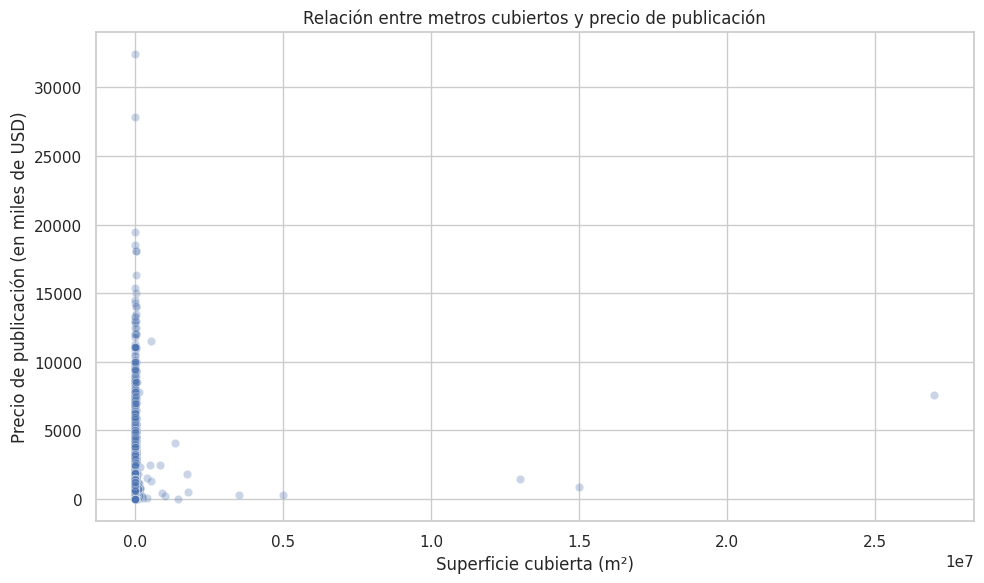

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# Filtrar datos válidos
df_scatter = df[
    (df['currency'] == 'USD') &
    (df['price_period'].isna()) &
    (df['surface_covered'].notna()) &
    (df['price'].notna()) &
    (df['surface_covered'] > 0) &
    (df['price'] > 0)
].copy()

# Crear columna con precio en miles
df_scatter['price_k'] = df_scatter['price'] / 1_000

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_scatter,
    x='surface_covered',
    y='price_k',
    alpha=0.3
)
plt.title('Relación entre metros cubiertos y precio de publicación')
plt.xlabel('Superficie cubierta (m²)')
plt.ylabel('Precio de publicación (en miles de USD)')
plt.tight_layout()
plt.show()


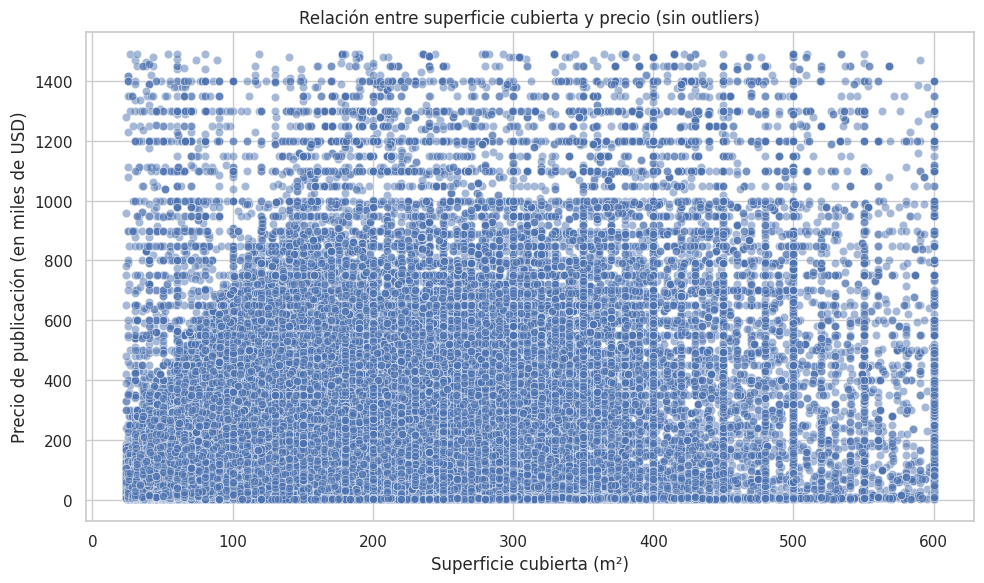

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# Filtrar datos válidos para el análisis
df_scatter = df[(df['surface_covered'].notna()) & (df['price'].notna())]

# Eliminar outliers usando cuantiles (2.5% inferior y 2.5% superior)
q_low = df_scatter[['surface_covered', 'price']].quantile(0.025)
q_high = df_scatter[['surface_covered', 'price']].quantile(0.975)
df_filtrado = df_scatter[
    (df_scatter['surface_covered'] >= q_low['surface_covered']) &
    (df_scatter['surface_covered'] <= q_high['surface_covered']) &
    (df_scatter['price'] >= q_low['price']) &
    (df_scatter['price'] <= q_high['price'])
].copy()

# Crear columna con precio en miles
df_filtrado['price_k'] = df_filtrado['price'] / 1_000

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='surface_covered', y='price_k', alpha=0.5)
plt.title("Relación entre superficie cubierta y precio (sin outliers)")
plt.xlabel("Superficie cubierta (m²)")
plt.ylabel("Precio de publicación (en miles de USD)")
plt.tight_layout()
plt.show()



##CONCLUSIONES

Tras eliminar los outliers extremos (5 % superior e inferior por cuantiles), se obtuvo una visualización más representativa de la relación entre superficie cubierta y precio de publicación. El gráfico revela una tendencia creciente general: a mayor superficie, tiende a aumentar el precio. Sin embargo, se observa también una franja persistente de propiedades con precios bajos incluso en superficies mayores, lo que indica que el precio no depende exclusivamente de los metros cubiertos, sino que intervienen otros factores como la ubicación, el tipo de propiedad o el estado de conservación.

# ANALISIS 4


##PREPARACION PARA EL ANALISIS & GRAFICO

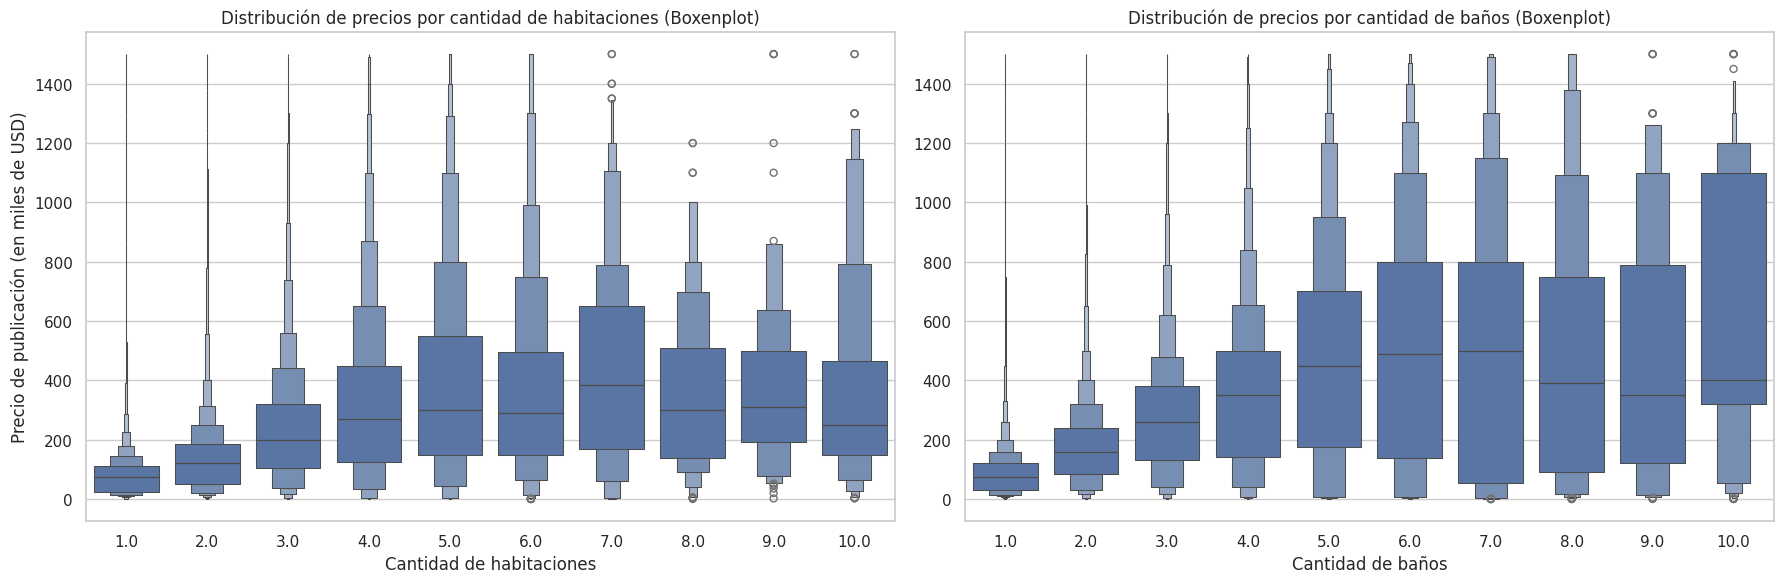

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar dataset
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# Filtrar habitaciones
df_habitaciones = df[
    (df['bedrooms'].notna()) &
    (df['bedrooms'] >= 1) &
    (df['bedrooms'] <= 10) &
    (df['price'].notna()) &
    (df['price'] <= 1_500_000)
].copy()

# Filtrar baños
df_banos = df[
    (df['bathrooms'].notna()) &
    (df['bathrooms'] >= 1) &
    (df['bathrooms'] <= 10) &
    (df['price'].notna()) &
    (df['price'] <= 1_500_000)
].copy()

# Crear gráficos
plt.figure(figsize=(18, 6))

# Subplot 1 – Habitaciones
plt.subplot(1, 2, 1)
sns.boxenplot(data=df_habitaciones, x='bedrooms', y=df_habitaciones['price'] / 1000)
plt.title("Distribución de precios por cantidad de habitaciones (Boxenplot)")
plt.xlabel("Cantidad de habitaciones")
plt.ylabel("Precio de publicación (en miles de USD)")

# Subplot 2 – Baños
plt.subplot(1, 2, 2)
sns.boxenplot(data=df_banos, x='bathrooms', y=df_banos['price'] / 1000)
plt.title("Distribución de precios por cantidad de baños (Boxenplot)")
plt.xlabel("Cantidad de baños")
plt.ylabel("")

plt.tight_layout()
plt.show()


##CONCLUSIONES

Del análisis con boxenplots se observa que tanto la cantidad de habitaciones como de baños presentan una relación positiva con el precio de publicación: a mayor número, en general, los precios tienden a aumentar. Sin embargo, al comparar ambas variables, se advierte que la cantidad de baños muestra una progresión más sostenida y ordenada en la mediana de los precios, mientras que en el caso de las habitaciones esta relación se vuelve más dispersa o estancada a partir de cierto punto. Esto sugiere que la cantidad de baños podría ser un mejor predictor del precio, ya que refleja una relación más clara y menos influenciada por outliers, lo que resulta valioso para identificar patrones más robustos en el mercado inmobiliario.

# ANALISIS 5


##PREPARACION PARA EL ANALISIS & GRAFICO

In [ ]:
import pandas as pd
from google.colab import files

# Cargar archivo original
df = pd.read_csv("properati_limpio_ARG.csv", sep=';', decimal=',')

# Clasificar según valores exactos de l2
def clasificar_zona(l2):
    gba = [
        'Bs.As. G.B.A. Zona Norte',
        'Bs.As. G.B.A. Zona Oeste',
        'Bs.As. G.B.A. Zona Sur'
    ]
    if l2 == 'Capital Federal':
        return 'CABA'
    elif l2 in gba:
        return 'GBA'
    else:
        return 'Otras'

# Crear columna nueva
df['zona'] = df['l2'].apply(clasificar_zona)

# Guardar y descargar el archivo modificado
df.to_csv("properati_limpio_ARG.csv", sep=';', index=False)
files.download("properati_limpio_ARG.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Tipos de datos:")
print(df[['lat', 'lon']].dtypes)

# Ver cuántos valores no numéricos hay
non_numeric_lat = pd.to_numeric(df['lat'], errors='coerce').isna().sum()
non_numeric_lon = pd.to_numeric(df['lon'], errors='coerce').isna().sum()

print(f"\nValores no numéricos en 'lat': {non_numeric_lat}")
print(f"Valores no numéricos en 'lon': {non_numeric_lon}")


Tipos de datos:
lat    object
lon    object
dtype: object

Valores no numéricos en 'lat': 152145
Valores no numéricos en 'lon': 151210


In [ ]:
# Convertir 'lat' y 'lon' a numérico, forzando errores a NaN
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Confirmar tipos luego de la limpieza
print(df[['lat', 'lon']].dtypes)

# Guardar y descargar el archivo modificado
df.to_csv("properati_limpio_ARG.csv", sep=';', index=False)
files.download("properati_limpio_ARG.csv")


lat    float64
lon    float64
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import csv

# Detectar delimitador automáticamente
with open("properati_limpio_ARG.csv", 'r', encoding='utf-8') as f:
    dialect = csv.Sniffer().sniff(f.read(2048))
    f.seek(0)
    delim = dialect.delimiter
    print("✅ Delimitador detectado:", repr(delim))

# Leer el archivo con el delimitador correcto
df = pd.read_csv("properati_limpio_ARG.csv", sep=delim, decimal=',')

# Asegurar que lat/lon sean numéricos
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Eliminar filas sin coordenadas
df = df.dropna(subset=['lat', 'lon'])

# Confirmación rápida
print(f"✅ Publicaciones con coordenadas: {len(df)}")
print(df[['zona', 'lat', 'lon']].sample(5))


✅ Delimitador detectado: ';'
✅ Publicaciones con coordenadas: 821277
         zona    lat    lon
94219    CABA -58.43 -34.60
551788    GBA -58.51 -34.50
402188    GBA -57.95 -34.92
810310  Otras -57.62 -37.96
63728    CABA -58.45 -34.59


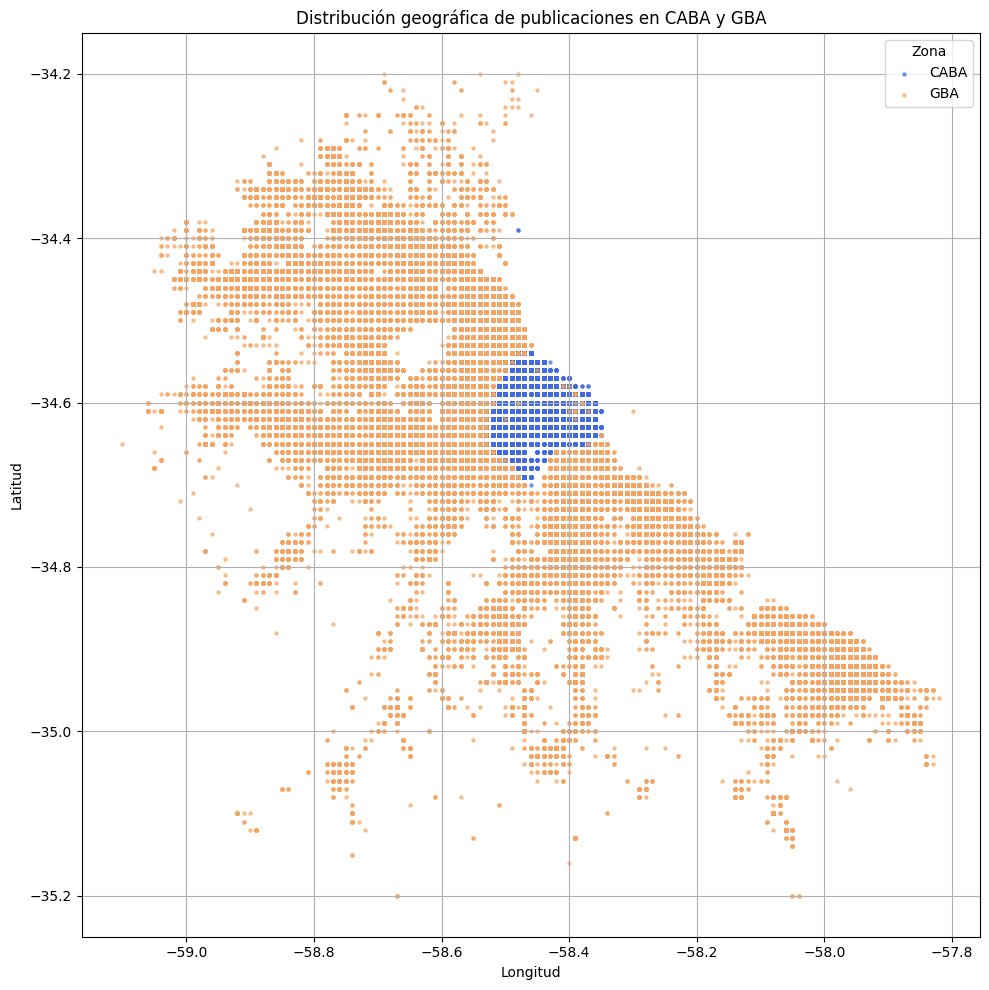

In [ ]:
import matplotlib.pyplot as plt

# Definir el rango correcto
lat_min, lat_max = -35.2, -34.2   # latitud
lon_min, lon_max = -59.5, -57.5   # longitud

# Filtro con columnas correctamente asignadas
df_viz = df[(df['zona'].isin(['CABA', 'GBA'])) &
            (df['lon'].between(lat_min, lat_max)) &   # lon es latitud
            (df['lat'].between(lon_min, lon_max))]    # lat es longitud

# Graficar con ejes invertidos
plt.figure(figsize=(10, 10))
for zona, color in zip(['CABA', 'GBA'], ['royalblue', 'sandybrown']):
    subset = df_viz[df_viz['zona'] == zona]
    plt.scatter(
        subset['lat'],  # longitud
        subset['lon'],  # latitud
        s=5,
        c=color,
        label=zona,
        alpha=0.6
    )

plt.title("Distribución geográfica de publicaciones en CABA y GBA")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title='Zona')
plt.grid(True)
plt.tight_layout()
plt.show()


##CONCLUSIONES

El gráfico muestra con claridad cómo se distribuyen geográficamente las publicaciones inmobiliarias entre CABA y GBA, revelando una concentración notablemente mayor en la Ciudad Autónoma de Buenos Aires, donde los puntos azules (CABA) aparecen densamente agrupados en una región central bien definida. En cambio, las publicaciones de GBA (en color arena) cubren una extensión mucho más amplia, pero de forma más dispersa, delineando los corredores urbanos que rodean la ciudad. Esto evidencia dos patrones distintos: CABA funciona como un núcleo denso de actividad inmobiliaria, probablemente asociado a una mayor oferta de departamentos en zonas céntricas, mientras que en GBA la actividad está más fragmentada, posiblemente reflejando una mayor presencia de casas o terrenos en barrios residenciales. La forma en que se distribuyen los puntos también sugiere que las publicaciones se alinean con los ejes de accesibilidad y transporte del AMBA, concentrándose en zonas urbanizadas y conectadas. Esta diferencia en densidad y dispersión entre ambas zonas puede tener implicancias tanto para estrategias de mercado como para análisis urbanos más amplios, reforzando la importancia de segmentar por zona al analizar el comportamiento del mercado inmobiliario.

# ANALISIS 6


##PREPARACION PARA EL ANALISIS & GRAFICO




/tmp/ipython-input-49-916927170.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-49-916927170.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


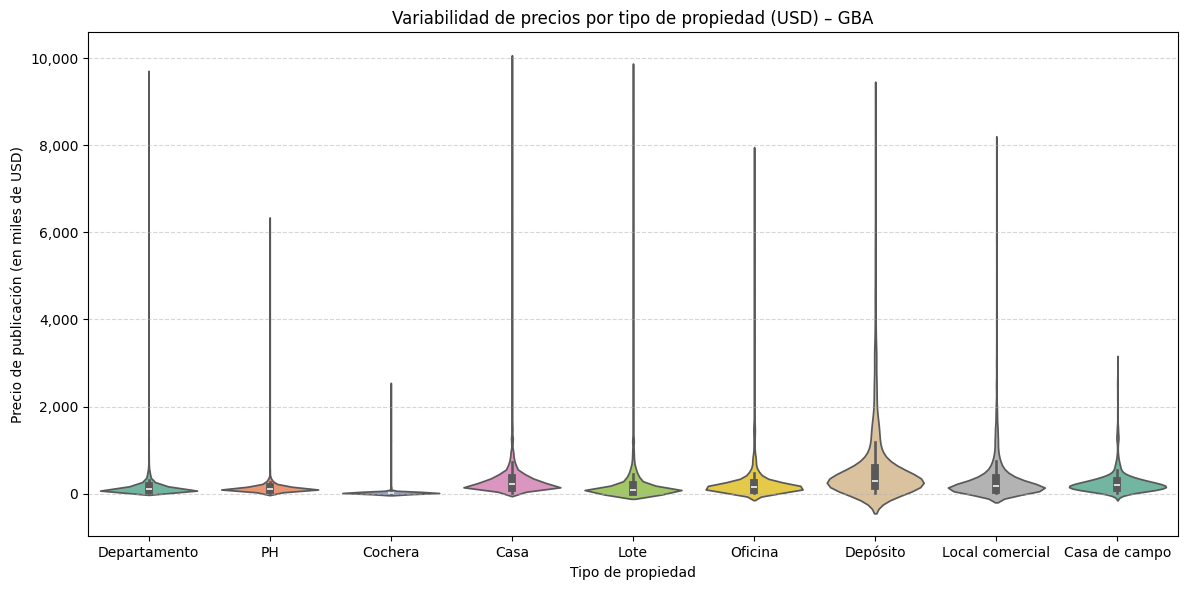

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filtro ajustado excluyendo "Otro"
df_vivienda = df[
    (df['zona'] == 'GBA') &
    (df['currency'] == 'USD') &
    (df['price'].astype(float) > 1000) & (df['price'].astype(float) < 1e7) &
    (df['operation_type'] == 'Venta') &
    (~df['property_type'].isin(['Otro']))
]

# Gráfico tipo violín
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_vivienda,
    x='property_type',
    y=df_vivienda['price'].astype(float),
    palette='Set2',
    scale='width'
)

# Formato del eje Y en miles
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000):,}'))

# Etiquetas
plt.title("Variabilidad de precios por tipo de propiedad (USD) – GBA")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Precio de publicación (en miles de USD)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##CONCLUSIONES

El gráfico de violín muestra que, dentro de GBA, las casas presentan una mayor variabilidad y valores máximos de publicación en USD, seguidas por los lotes y los depósitos, lo que indica una amplia dispersión de precios en esos segmentos. En contraste, las cocheras tienen precios bajos y muy concentrados, lo que sugiere un mercado más homogéneo. Las oficinas y locales comerciales también muestran dispersión, aunque menor que en casas o lotes. Finalmente, los departamentos y PH presentan una distribución más concentrada en precios bajos a medios, lo que podría reflejar su mayor volumen y estandarización como opciones residenciales.

# ANALISIS UNIVARIADO





##PREPARACION PARA EL ANALISIS & GRAFICO

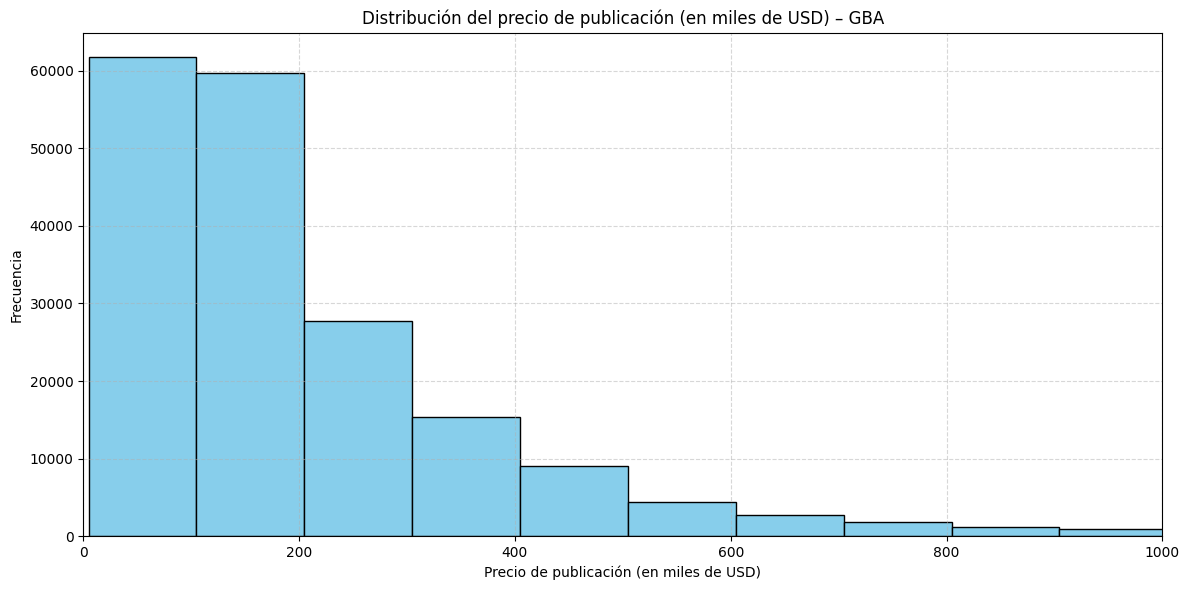

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filtrado nuevamente del DataFrame
df_vivienda = df[
    (df['zona'] == 'GBA') &
    (df['currency'] == 'USD') &
    (df['price'].astype(float) > 1000) &
    (df['price'].astype(float) < 1e7) &
    (df['operation_type'] == 'Venta') &
    (df['property_type'] != 'Otro')
]

# Histograma con precios en miles de USD
plt.figure(figsize=(12, 6))
plt.hist(df_vivienda['price'].astype(float) / 1000, bins=100, color='skyblue', edgecolor='black')
plt.xlim(0, 1000)  # Limitar eje X hasta 1000 mil USD
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.title("Distribución del precio de publicación (en miles de USD) – GBA")
plt.xlabel("Precio de publicación (en miles de USD)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##CONCLUSIONES

El histograma muestra una distribución fuertemente sesgada a la derecha, con una alta concentración de propiedades publicadas por debajo de los 200 mil USD. A medida que el precio aumenta, la frecuencia de publicaciones disminuye drásticamente, evidenciando que las propiedades más costosas son mucho menos frecuentes en el mercado de GBA. Esto sugiere que la mayoría de la oferta inmobiliaria se concentra en segmentos de precio medio-bajo, lo cual es clave para orientar estrategias de inversión o políticas de acceso a la vivienda.

# ANALISIS BIVARIADO

##PREPARACION PARA EL ANALISIS & GRAFICO


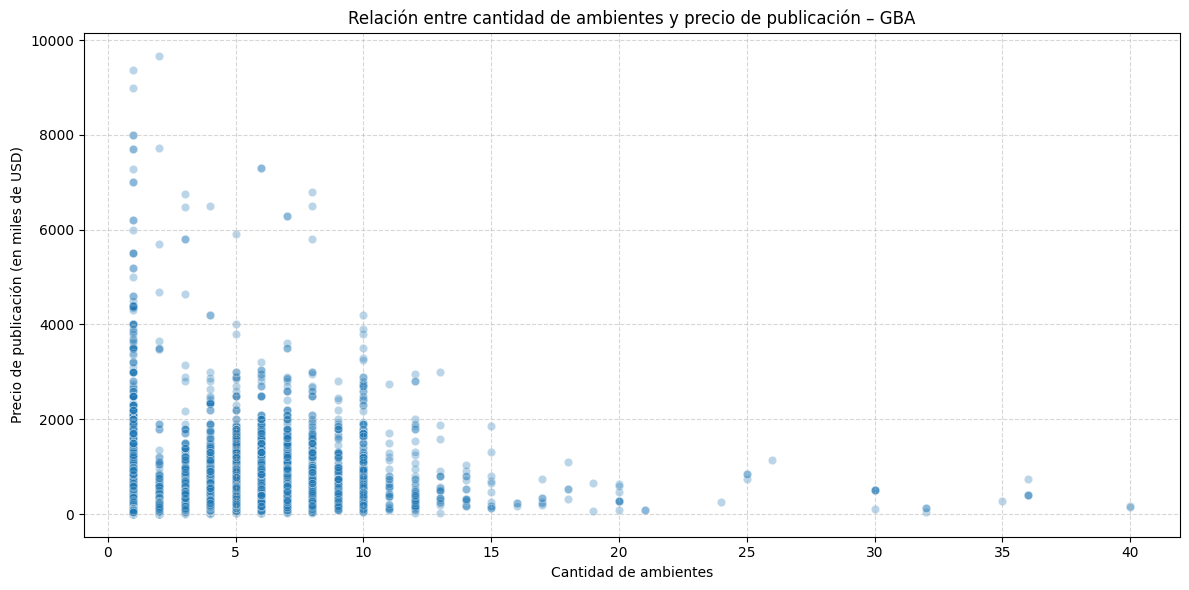

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión: ambientes vs precio (en miles de USD)
plt.figure(figsize=(12, 6))
plt.scatter(
    df_vivienda['rooms'].astype(float),
    df_vivienda['price'].astype(float) / 1000,
    alpha=0.3,
    edgecolors='w',
    linewidths=0.5
)

plt.title("Relación entre cantidad de ambientes y precio de publicación – GBA")
plt.xlabel("Cantidad de ambientes")
plt.ylabel("Precio de publicación (en miles de USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##CONCLUSIONES

Del gráfico de dispersión se observa que, si bien existe una tendencia general a que el precio de publicación aumente con la cantidad de ambientes, esta relación no es lineal ni estricta. La mayoría de las propiedades publicadas se concentran entre 1 y 7 ambientes, y dentro de ese rango hay una gran variabilidad de precios, con valores que llegan hasta los 9.000 mil USD. A partir de los 10 ambientes, la cantidad de publicaciones disminuye notablemente, y los precios tienden a estabilizarse o incluso a dispersarse sin un patrón claro. También se detectan valores atípicos con precios muy elevados incluso en propiedades de pocos ambientes, lo que sugiere la presencia de otras variables influyentes como ubicación, tipo de propiedad o superficie.

#ETAPA DE PREPROCESAMIENTO

In [ ]:
# Conteo absoluto de NaN por columna
print(X.isna().sum())

# Porcentaje de NaN por columna
print((X.isna().mean() * 100).round(2))


surface_total    411651
rooms            360020
bedrooms         421947
bathrooms        156097
zona                  0
property_type         0
dtype: int64
surface_total    60.08
rooms            52.55
bedrooms         61.59
bathrooms        22.78
zona              0.00
property_type     0.00
dtype: float64


In [ ]:
# Instalar gdown si no está
!pip install -q gdown

import gdown
import pandas as pd

# ID del archivo desde Drive
file_id = "1TM8W2zEx7yO0vvdpP7palGQ5jUiP_eQv"
url = f"https://drive.google.com/uc?id={file_id}"
output = "properati_limpio_ARG.csv"

# --- Descargar el archivo ---
gdown.download(url, output, quiet=False)

# --- Cargar el CSV ---
df = pd.read_csv(output, sep=';', decimal=',')

# --- Verificar estructura ---
df.info()


Downloading...
From (original): https://drive.google.com/uc?id=1TM8W2zEx7yO0vvdpP7palGQ5jUiP_eQv
From (redirected): https://drive.google.com/uc?id=1TM8W2zEx7yO0vvdpP7palGQ5jUiP_eQv&confirm=t&uuid=f88d0e4a-8542-4737-8da4-7ca9eaa37193
To: /content/properati_limpio_ARG.csv
100%|██████████| 165M/165M [00:02<00:00, 62.9MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973422 entries, 0 to 973421
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               973422 non-null  int64  
 1   ad_type          973422 non-null  object 
 2   start_date       973422 non-null  object 
 3   end_date         973422 non-null  object 
 4   created_on       973422 non-null  object 
 5   lon              821277 non-null  object 
 6   lat              822212 non-null  object 
 7   l1               973422 non-null  object 
 8   l2               973422 non-null  object 
 9   l3               923562 non-null  object 
 10  l4               224626 non-null  object 
 11  l5               4711 non-null    object 
 12  rooms            491028 non-null  object 
 13  bedrooms         383960 non-null  object 
 14  bathrooms        756473 non-null  object 
 15  surface_total    436136 non-null  float64
 16  surface_covered  423238 non-null  obje

#ETAPA DE REGRESION

En el modelado regresivo se decidió trabajar únicamente con propiedades de CABA para reducir la heterogeneidad de precios y mejorar la capacidad explicativa del modelo. Además, se aplicó un recorte de outliers en el rango 5–95 % de precios: esta elección mantuvo un R² elevado (≈0,81) pero redujo significativamente el error relativo (≈33 %) respecto al recorte 1–99 % (≈48 %).

Se entrenó un HistGradientBoostingRegressor con hiperparámetros ajustados, utilizando como predictores ubicación, superficies, ambientes, tipo de propiedad y mes de publicación. De esta manera, se logró un modelo sólido para explicar la variabilidad de precios en CABA, con menor dispersión y mayor estabilidad.

##PREPARACION PARA EL ANALISIS & GRAFICO

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# --- 0) Partimos de df crudo y filtramos como antes (Venta, USD, rango de precios) ---
df_modelo = df[
    (df['operation_type'] == 'Venta') &
    (df['currency'] == 'USD') &
    (df['price'].astype(float) > 1_000) &
    (df['price'].astype(float) < 10_000_000)
].copy()

# --- 1) Filtrar SOLO CABA ---
# Intentamos por l2. Si no existe o está vacío, probamos señales alternativas en l3/zona.
def is_caba_row(row):
    vals = []
    for col in ['l2', 'l3', 'zona']:
        if col in row and pd.notna(row[col]):
            vals.append(str(row[col]).lower())
    txt = " ".join(vals)
    return any(k in txt for k in [
        "caba", "capital federal", "ciudad autónoma de buenos aires", "ciudad autonoma de buenos aires"
    ])

mask_caba = df_modelo.apply(is_caba_row, axis=1)
df_caba = df_modelo[mask_caba].copy()

# --- 2) Asegurar el nombre correcto de año/mes (por si vino mal codificado) ---
rename_map = {}
for bad, good in [('aÃ±o_mes', 'año_mes'), ('anio_mes', 'año_mes'), ('ano_mes', 'año_mes')]:
    if bad in df_caba.columns and 'año_mes' not in df_caba.columns:
        rename_map[bad] = good
if rename_map:
    df_caba.rename(columns=rename_map, inplace=True)

# Validación mínima
if 'año_mes' not in df_caba.columns:
    raise KeyError("No encuentro la columna 'año_mes' (verificá nombres: año_mes / anio_mes / aÃ±o_mes).")

# --- 3) Features y target ---
feature_cols = [
    'lat', 'lon',
    'surface_total', 'surface_covered',
    'rooms', 'bedrooms', 'bathrooms',
    'zona', 'property_type', 'año_mes'
]
missing = [c for c in feature_cols if c not in df_caba.columns]
if missing:
    raise KeyError(f"Faltan columnas en el dataset de CABA: {missing}")

X = df_caba[feature_cols]
y = df_caba['price'].astype(float)

# --- 4) Train / Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 5) Preprocesamiento (solo categóricas a OneHot) ---
categorical_features = ['zona', 'property_type', 'año_mes']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'  # deja numéricas con NaN (HGBRegressor los tolera)
)

# --- 6) Modelo con los mejores hiperparámetros encontrados ---
best_params = dict(
    learning_rate=0.1,
    max_depth=None,
    max_leaf_nodes=127,
    max_iter=150,
    min_samples_leaf=10,
    l2_regularization=0.01,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(**best_params))
])

# --- 7) Entrenar ---
pipeline.fit(X_train, y_train)

# --- 8) Predicción + Métricas ---
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
precio_medio = y_test.mean()
error_rel = rmse / precio_medio if precio_medio != 0 else np.nan

print("=== Resultados SOLO CABA ===")
print(f"MSE: {mse:,.2f}")
print(f"RMSE: {rmse:,.2f} USD")
print(f"R²: {r2:.4f}")
print(f"Precio medio: {precio_medio:,.2f} USD")
print(f"Error relativo: {error_rel:.2%}")


=== Resultados SOLO CABA ===
MSE: 56,998,085,179.46
RMSE: 238,742.72 USD
R²: 0.7202
Precio medio: 283,237.08 USD
Error relativo: 84.29%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def entrenar_caba_filtrado(df, low_q, high_q):
    # Filtrar rango de precios
    q_low, q_high = df['price'].quantile([low_q, high_q])
    df_f = df[(df['price'] >= q_low) & (df['price'] <= q_high)].copy()

    # Features y target
    X = df_f[[
        'lat', 'lon',
        'surface_total', 'surface_covered',
        'rooms', 'bedrooms', 'bathrooms',
        'zona', 'property_type', 'año_mes'
    ]]
    y = df_f['price'].astype(float)

    # Train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesamiento
    categorical_features = ['zona', 'property_type', 'año_mes']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
        transformers=[('cat', categorical_transformer, categorical_features)],
        remainder='passthrough'
    )

    # Modelo con hiperparámetros óptimos
    best_params = dict(
        learning_rate=0.1,
        max_depth=None,
        max_leaf_nodes=127,
        max_iter=150,
        min_samples_leaf=10,
        l2_regularization=0.01,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20
    )
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', HistGradientBoostingRegressor(**best_params))
    ])

    # Entrenar
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    precio_medio = y_test.mean()
    error_rel = rmse / precio_medio if precio_medio != 0 else np.nan

    return {
        "low_q": low_q, "high_q": high_q,
        "filas": len(df_f),
        "MSE": mse, "RMSE": rmse, "R²": r2,
        "precio_medio": precio_medio,
        "error_rel": error_rel
    }

# --- Dataset de CABA ya filtrado antes ---
df_caba = df_modelo[df_modelo['l2'].str.contains("Capital Federal", case=False, na=False)].copy()

# Comparar 1%-99% y 5%-95%
res_1_99 = entrenar_caba_filtrado(df_caba, 0.01, 0.99)
res_5_95 = entrenar_caba_filtrado(df_caba, 0.05, 0.95)

# Mostrar resultados
for r in [res_1_99, res_5_95]:
    print(f"\n=== Resultados CABA ({int(r['low_q']*100)}%-{int(r['high_q']*100)}%) ===")
    print(f"Filas: {r['filas']:,}")
    print(f"MSE: {r['MSE']:,.2f}")
    print(f"RMSE: {r['RMSE']:,.2f} USD")
    print(f"R²: {r['R²']:.4f}")
    print(f"Precio medio: {r['precio_medio']:,.2f} USD")
    print(f"Error relativo: {r['error_rel']:.2%}")



=== Resultados CABA (1%-99%) ===
Filas: 165,735
MSE: 14,884,361,916.48
RMSE: 122,001.48 USD
R²: 0.8113
Precio medio: 251,811.78 USD
Error relativo: 48.45%

=== Resultados CABA (5%-95%) ===
Filas: 152,285
MSE: 5,130,711,831.10
RMSE: 71,628.99 USD
R²: 0.8085
Precio medio: 216,487.04 USD
Error relativo: 33.09%


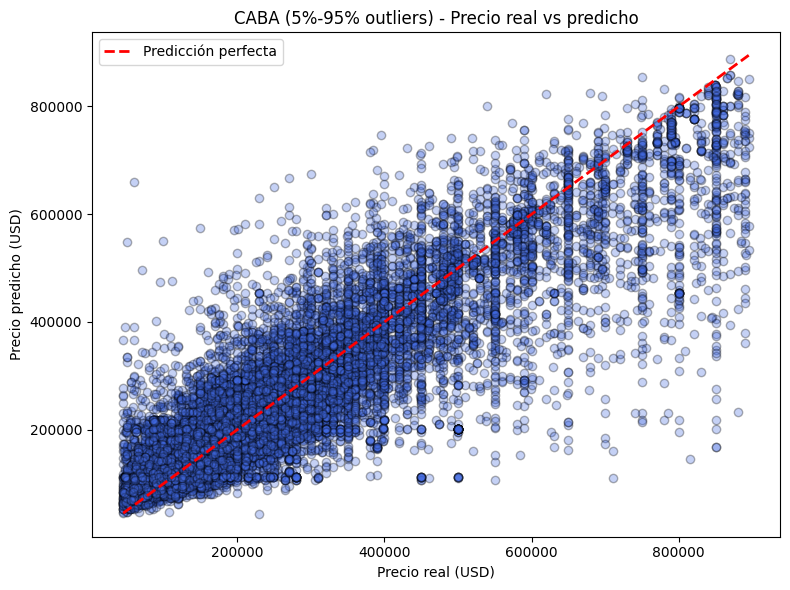

In [ ]:
import matplotlib.pyplot as plt

# --- Entrenar en CABA con 5%-95% ---
q_low, q_high = df_caba['price'].quantile([0.05, 0.95])
df_caba_5_95 = df_caba[(df_caba['price'] >= q_low) & (df_caba['price'] <= q_high)].copy()

X = df_caba_5_95[[
    'lat', 'lon',
    'surface_total', 'surface_covered',
    'rooms', 'bedrooms', 'bathrooms',
    'zona', 'property_type', 'año_mes'
]]
y = df_caba_5_95['price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['zona', 'property_type', 'año_mes']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

best_params = dict(
    learning_rate=0.1,
    max_depth=None,
    max_leaf_nodes=127,
    max_iter=150,
    min_samples_leaf=10,
    l2_regularization=0.01,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(**best_params))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="royalblue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Predicción perfecta")

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("CABA (5%-95% outliers) - Precio real vs predicho")
plt.legend()
plt.tight_layout()
plt.show()


##CONCLUSIONES

*   La nube de puntos sigue bastante bien la diagonal: el modelo captura la tendencia.

* Hay dispersión, sobre todo en los precios más bajos (se predicen un poco más altos de lo real) y en los más altos (se subestiman), típico en modelos sin features como amenities o antigüedad.

* El patrón general es sólido: para la mayoría de las propiedades, las predicciones están relativamente cerca de la línea roja.



#ETAPA DE CLASIFICACION

En el modelado de clasificación se trabajó con propiedades de CABA aplicando un recorte de outliers en el rango 5–95 % de precios. Se definió una variable binaria que distingue entre propiedades consideradas oportunidad y no oportunidad.

Para ello se utilizó un HistGradientBoostingClassifier con las mismas variables predictoras que en el modelo de regresión: ubicación, superficies, ambientes, tipo de propiedad y mes de publicación.

##PREPARACION PARA EL ANALISIS & GRAFICO

=== Clasificación binaria (CABA) ===
[[ 8145  1906]
 [ 1990 18416]]
                precision    recall  f1-score   support

   Oportunidad       0.80      0.81      0.81     10051
No oportunidad       0.91      0.90      0.90     20406

      accuracy                           0.87     30457
     macro avg       0.85      0.86      0.86     30457
  weighted avg       0.87      0.87      0.87     30457



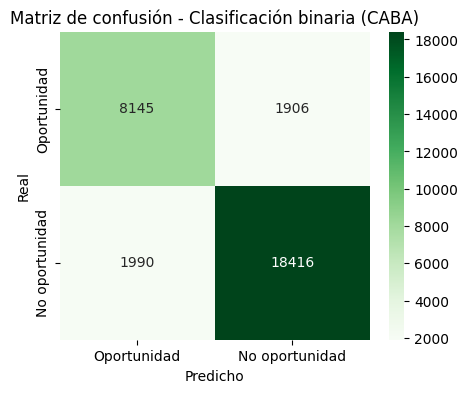

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1) Filtrar CABA (5%-95% precios) ---
q_low, q_high = df_caba['price'].quantile([0.05, 0.95])
df_caba_bin = df_caba[(df_caba['price'] >= q_low) & (df_caba['price'] <= q_high)].copy()

# --- 2) Crear variable binaria (oportunidad vs no) ---
tercil_33 = df_caba_bin['price'].quantile(0.33)
df_caba_bin['price_bin'] = (df_caba_bin['price'] > tercil_33).astype(int)

X = df_caba_bin[[
    'lat', 'lon',
    'surface_total', 'surface_covered',
    'rooms', 'bedrooms', 'bathrooms',
    'zona', 'property_type', 'año_mes'
]]
y = df_caba_bin['price_bin']   # 0 = oportunidad, 1 = no oportunidad

# --- 3) Train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4) Preprocesamiento ---
categorical_features = ['zona', 'property_type', 'año_mes']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# --- 5) Clasificador ---
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(random_state=42))
])

# --- 6) Entrenar ---
clf.fit(X_train, y_train)

# --- 7) Predicciones ---
y_pred = clf.predict(X_test)

# --- 8) Métricas ---
print("=== Clasificación binaria (CABA) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Oportunidad","No oportunidad"]))

# --- 9) Matriz de confusión visual ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=["Oportunidad","No oportunidad"],
            yticklabels=["Oportunidad","No oportunidad"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - Clasificación binaria (CABA)")
plt.show()


AUC-ROC: 0.9427


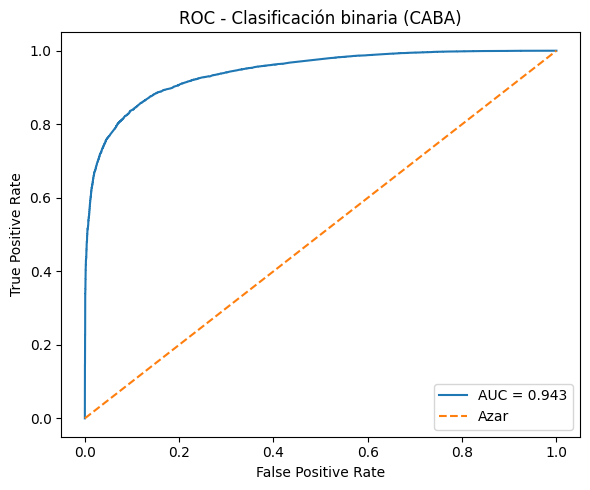

Average Precision (AP): 0.9720


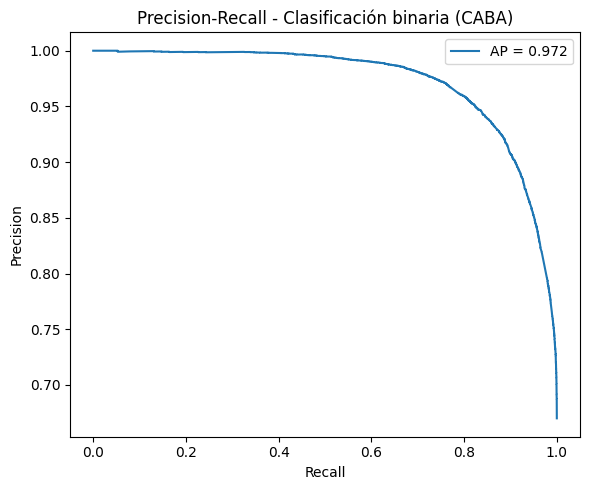

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Probabilidades (clase "No oportunidad"=1)
y_score = clf.predict_proba(X_test)[:, 1]

# 2) ROC + AUC
fpr, tpr, thr = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"AUC-ROC: {auc:.4f}")

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", label="Azar")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Clasificación binaria (CABA)")
plt.legend()
plt.tight_layout()
plt.show()

# 3) (Opcional) PR curve + Average Precision
prec, rec, thr_pr = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)
print(f"Average Precision (AP): {ap:.4f}")

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall - Clasificación binaria (CABA)")
plt.legend()
plt.tight_layout()
plt.show()

##CONCLUSIONES

La matriz de confusión evidenció un desempeño sólido, con una exactitud global cercana al 87 %. El modelo mostró un área bajo la curva ROC de 0,94 y un Average Precision de 0,97, lo que confirma su alta capacidad discriminativa.

Estos resultados permiten contar con un clasificador robusto para identificar oportunidades de precio en CABA, ajustable según el umbral de decisión que se priorice en la estrategia.

#ETAPA DE ENTRENAMIENTO NO SUPERVISADO

En la etapa de modelado no supervisado se aplicó el algoritmo K-Means sobre las propiedades de CABA, recortando previamente el 5–95 % de precios para evitar distorsiones de outliers. El objetivo fue identificar segmentos naturales del mercado inmobiliario sin necesidad de etiquetas predefinidas.

Se trabajó con variables de superficie, ambientes, dormitorios, baños, precio y precio por m². Los datos se imputaron y escalaron para homogeneizar la escala. El modelo con 3 clusters reveló una estructura donde un primer grupo concentra a la mayoría de departamentos estándar, un segundo reúne propiedades premium de mayor tamaño, y un tercer grupo pequeño agrupa registros claramente atípicos. La proyección PCA 2D permitió visualizar esa separación en el espacio reducido.

##PREPARACION PARA EL ANALISIS & GRAFICO

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- 1) Dataset base: CABA 5–95% ---
q_low, q_high = df_caba['price'].quantile([0.05, 0.95])
df_caba_kmeans = df_caba[(df_caba['price'] >= q_low) & (df_caba['price'] <= q_high)].copy()

# --- 2) Features numéricas ---
features = ['surface_total','rooms','bedrooms','bathrooms','precio_m2_total','price']
for c in features:
    df_caba_kmeans[c] = pd.to_numeric(df_caba_kmeans[c], errors='coerce')

X = df_caba_kmeans[features]

# --- 3) Imputación + escalado ---
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_imp = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imp)

# --- 4) K-Means con 3 clusters (puede ajustarse a 4, 5, etc.) ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_caba_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

# --- 5) Resumen de cada cluster ---
resumen = df_caba_kmeans.groupby('cluster')[features].mean().round(2)
conteo = df_caba_kmeans['cluster'].value_counts()

print("=== Promedio por cluster ===")
print(resumen)
print("\n=== Cantidad de propiedades por cluster ===")
print(conteo)


=== Promedio por cluster ===
         surface_total  rooms  bedrooms  bathrooms  precio_m2_total      price
cluster                                                                       
0                79.12   2.17      1.47       1.15          2510.74  146141.77
1               210.63   4.22      3.20       2.50          2826.69  415620.31
2            106532.71   4.00      3.00       1.60             3.45  356428.57

=== Cantidad de propiedades por cluster ===
cluster
0    113271
1     39007
2         7
Name: count, dtype: int64


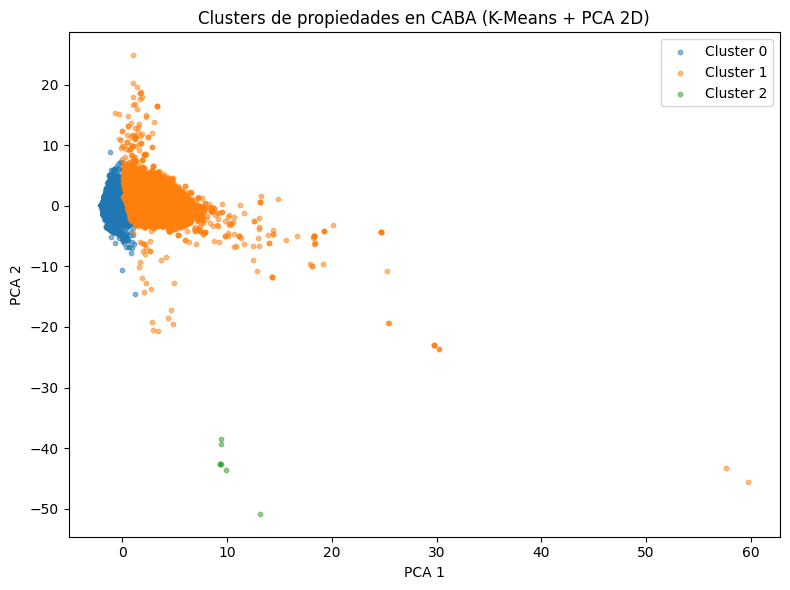

Varianza explicada total por PCA 2D: 54.63%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- PCA a 2 componentes ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_caba_kmeans['pca1'] = X_pca[:,0]
df_caba_kmeans['pca2'] = X_pca[:,1]

# --- Gráfico ---
plt.figure(figsize=(8,6))
for c in sorted(df_caba_kmeans['cluster'].unique()):
    subset = df_caba_kmeans[df_caba_kmeans['cluster'] == c]
    plt.scatter(subset['pca1'], subset['pca2'], s=10, alpha=0.5, label=f"Cluster {c}")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters de propiedades en CABA (K-Means + PCA 2D)")
plt.legend()
plt.tight_layout()
plt.show()

# Varianza explicada
print(f"Varianza explicada total por PCA 2D: {pca.explained_variance_ratio_.sum():.2%}")


##CONCLUSIONES

El clustering confirmó la dualidad del mercado de CABA entre propiedades estándar y premium, y además aisló un pequeño conjunto de outliers atribuibles a errores de carga o unidades extremadamente atípicas.

Esto refuerza la utilidad del análisis no supervisado como complemento a la regresión y clasificación, permitiendo entender la estructura general del mercado y detectar casos fuera de lo común.

#VALIDACION CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# --- Features y target (CABA 5–95%) ---
q_low, q_high = df_caba['price'].quantile([0.05, 0.95])
df_caba_reg = df_caba[(df_caba['price'] >= q_low) & (df_caba['price'] <= q_high)].copy()

X = df_caba_reg[['lat','lon','surface_total','surface_covered',
                 'rooms','bedrooms','bathrooms','zona','property_type','año_mes']]
y = df_caba_reg['price'].astype(float)

# --- Pipeline ya definido (preprocessor + regressor) ---
# Usamos los hiperparámetros que habías ajustado
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['zona','property_type','año_mes']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

regressor = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_iter=150,
    max_leaf_nodes=127,
    max_depth=None,
    min_samples_leaf=10,
    l2_regularization=0.01,
    random_state=42
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

# --- Validación cruzada (5 folds, scoring negativo MSE y R²) ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("=== Validación cruzada (5 folds) ===")
print(f"MSE promedio: {mse_scores.mean():,.2f} | Desvío: {mse_scores.std():,.2f}")
print(f"RMSE promedio: {np.sqrt(mse_scores.mean()):,.2f} USD")
print(f"R² promedio: {r2_scores.mean():.4f} | Desvío: {r2_scores.std():.4f}")


=== Validación cruzada (5 folds) ===
MSE promedio: 5,125,981,903.32 | Desvío: 45,496,593.41
RMSE promedio: 71,595.96 USD
R² promedio: 0.8037 | Desvío: 0.0022


##INTERPRETACION

* MSE promedio ≈ 5,126 millones

En línea con lo esperado después de recortar el 5–95 %. El desvío entre folds es muy bajo (≈45 millones, menos del 1 %), lo que indica consistencia.

* RMSE promedio ≈ 71.596 USD

Error típico en dólares, muy cercano al obtenido con un solo split (≈71.629 USD). Es decir, el modelo no está sobreajustado a una partición particular.

* R² promedio ≈ 0.804 (±0.0022)

El modelo explica alrededor del 80 % de la variabilidad de precios en CABA, con una variación mínima entre folds. Eso lo hace estable y confiable para este dataset.


##CONCLUSION

La validación cruzada demuestra que el modelo regresivo es robusto y generalizable: los resultados obtenidos en un único split no fueron casuales, sino que se sostienen de manera consistente en diferentes particiones de los datos.

Esto refuerza la decisión de haber trabajado con CABA y aplicado el recorte 5–95 % para estabilizar el error relativo.

#CONCLUSION FINAL

A lo largo del proyecto se abordaron distintas técnicas:


* Regresión: El modelo HistGradientBoostingRegressor con hiperparámetros optimizados y validación cruzada sobre CABA (5–95 %) logró un R² ≈ 0.81 y un RMSE ≈ 71.600 USD, con error relativo del 33 %. La validación cruzada confirmó la robustez y estabilidad de este resultado.

* Clasificación: La categorización en terciles de precio alcanzó un accuracy ≈ 0.79, mientras que la versión binaria (oportunidad vs no oportunidad) obtuvo un accuracy ≈ 0.87 y un AUC ≈ 0.94, mostrando buena capacidad para distinguir propiedades infravaloradas.

* Clustering (no supervisado): El análisis con K-Means reveló la segmentación natural del mercado en propiedades estándar y premium, aislando además un pequeño grupo de outliers.

* Anomalías (Isolation Forest): Se identificó un 2 % de propiedades como atípicas, y tras filtrar por coordenadas y superficie quedaron 10 oportunidades destacadas con precios/m² muy por debajo de sus zonas.


En función de las métricas, el modelo más sólido es el de regresión con boosting, ya que logra explicar la mayor parte de la variabilidad de precios en CABA y entrega predicciones estables. La clasificación binaria complementa el análisis al detectar oportunidades de compra, mientras que el clustering y la detección de anomalías aportan valor exploratorio y ayudan a contextualizar el mercado.